# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

df = pd.read_csv('human_body_temperature.csv')
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [10]:
df.columns

Index([u'temperature', u'gender', u'heart_rate'], dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [50]:
df_stats = df.temperature.describe()
df_stats

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [29]:
df_gender = df.groupby('gender')
df_gender

In [32]:
df_gender.mean()

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


('Result of normal test:', NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254))


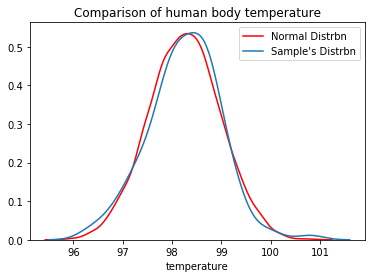

In [42]:
# Plot showing the sample & normal temperatures for comparison
ideal_normal = np.random.normal(df.temperature.mean(),df.temperature.std(),size=10000)
sns.distplot(ideal_normal,hist=False,color='red',label='Normal Distrbn')
sns.distplot(df.temperature,hist=False,label='Sample\'s Distrbn')
plt.legend(loc='upper right')
plt.title('Comparison of human body temperature')
print("Result of normal test:",stats.normaltest(df.temperature))

## Question #1:
### Is the distribution of body temperatures normal?

#### - The distribution of body temperatures is normal. I was surprised to see that body temperatures vary as much as they do.

In [34]:
df_gender.describe()

heart_rate                                                     \
            count       mean       std   min   25%   50%   75%   max   
gender                                                                 
F            65.0  74.153846  8.105227  57.0  68.0  76.0  80.0  89.0   
M            65.0  73.369231  5.875184  58.0  70.0  73.0  78.0  86.0   

       temperature                                                      
             count       mean       std   min   25%   50%   75%    max  
gender                                                                  
F             65.0  98.393846  0.743488  96.4  98.0  98.4  98.8  100.8  
M             65.0  98.104615  0.698756  96.3  97.6  98.1  98.6   99.5

In [33]:
df_gender.count()

,temperature,heart_rate
gender,,
F,65,65
M,65,65


## Question #2:

### Is the sample size large? Are the observations independent?

#### - The sample size is 130, 65 Male & 65 Female,  which is greater than 30. By CLT standards, this is a large sample size. The observations appear to be independent. 

In [44]:
df.mean()

temperature    98.249231
heart_rate     73.761538
dtype: float64

## Question #3:

### Is the true population mean really 98.6 degrees F?
   - Would you use a one-sample or two-sample test? Why?
   - In this situation, is it appropriate to use the  tt  or  zz  statistic?
   - Now try using the other test. How is the result be different? Why?

#### Based on the data we were provided, 98.6 degrees is not the mean temperature. The mean of the data provided is 98.25 degrees, which is slightly lower than 98.6 degrees. 
 - We would use a one-sample test for this as we are not comparing to 2 different populations for this, just comparing to 1 known value of 98.6 degrees. 
 - Since our sample size is larger than 30, we would use the ZZ statistics

In [54]:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

 - We essencially see the same value in both the Z test & t test.

## Question #4:

In [60]:
samples10 = np.random.choice(a=df.temperature,size=10,replace=False)
# sample t test
(tstat10,ttestpval10) = stats.ttest_1samp(samples10,98.6)
# sample z test
z10 = np.abs(np.mean(samples10)-98.6)/(np.std(samples10)/np.sqrt(10))
print("t-stat with random 10:",abs(tstat10))
print("z-stat with random 10:",z10)
pval10 = 2*(1 - stats.norm.cdf(abs(z10)))
print("Pvalue computed using t-stat and builtin function is",ttestpval10)
print("Pvalue computed using z-stat and builtin function is",pval10)

('t-stat with random 10:', 1.7989040488287205)
('z-stat with random 10:', 1.8962113621325034)
('Pvalue computed using t-stat and builtin function is', 0.10557362791854424)
('Pvalue computed using z-stat and builtin function is', 0.057932101344879028)


### Draw a small sample of size 10 from the data and repeat both tests.
   - Which one is the correct one to use?
   - What do you notice? What does this tell you about the difference in application of the tt and zz statistics?

#### - I think the t-stat is a better measure for small sample sizes, as it is more realistic than z-stat.
#### - The 10 samples are randomly choisen by numpy each time the cell is run. I was very surprised to see how big of a difference each time I ran the cell. Also noticed that the t test statistic was always slightly lower than the z test. 


## Question #5:

In [63]:
# Measure margin of error
margin_of_error = 2.575*df_stats[2]
print('Margin of error for 99% confidence interval',margin_of_error)
ci_tuple = (round(df_stats[1]-margin_of_error,2),round(df_stats[1]+margin_of_error,2))
print('99% confidence interval of the population mean:',ci_tuple)

('Margin of error for 99% confidence interval', 1.8879466319502844)
('99% confidence interval of the population mean:', (96.36, 100.14))


### At what temperature should we consider someone's temperature to be "abnormal"?
### Start by computing the margin of error and confidence interval.

- Based on the mean body temperature of 98.25 degrees we found in our data, any value at a distance more than 2.575*approx std, specifically 96.36 or 100.14 degrees fahrenheit, would be considered to be abnormal. 

## Question #6:
### Is there a significant difference between males and females in normal temperature?
    - What test did you use and why?
    - Write a story with your conclusion in the context of the original problem.

In [66]:
ft = df.loc[df.gender == 'F']['temperature']
mt = df.loc[df.gender == 'M']['temperature']
print(ft.describe())
print(mt.describe())

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64
count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64


In [69]:
# running 2 sample z tests
common_se = np.sqrt((ft.std()**2+mt.std()**2)/len(mt))
z_score = (ft.mean() - mt.mean())/common_se
print("z-stat for the two sample means with common standard error =",z_score)
pval_2samp= 2*(1 - stats.norm.cdf(abs(z_score)))
print("pvalue obtained for two sample z-test",pval_2samp)

('z-stat for the two sample means with common standard error =', 2.2854345381652741)
('pvalue obtained for two sample z-test', 0.022287360760677277)


#### - There is a slight difference between the mean male & female body temperatures. I was surprised to find that the female body temperature is slightly warmer than the male body temperature since my wife is always cold. 
#### - I used 2 z tests as their findings seemed the most accurate and made the most sense from previous tests. 

## Conclusions

- Based on the data we were provided, 98.6 degrees is not the mean average body temperature. The mean of the data provided is 98.25 degrees, which is slightly lower than 98.6 degrees.
- We could consider a human body temperature abnormal, if the temperature lies outside of 96.05/100.45 degrees F